In [1]:
from autumn.tools.project import get_project
from matplotlib import pyplot
from autumn.tools.plots.utils import REF_DATE
from autumn.tools.calibration.targets import get_target_series
import pandas as pd
from autumn.tools.utils.pretty import pretty_print

In [2]:
project = get_project("covid_19", "ho_chi_minh_city")

In [3]:
custom_params = project.param_set.baseline
# custom_params = project.param_set.baseline.update({'contact_rate': 0.1,
#                                                    'infection_fatality': {'multiplier': 2.407957228094271},
#                                                    'mobility':{'microdistancing':{'behaviour':{'parameters':{'max_effect': 0.3}}}}})
model = project.run_baseline_model(custom_params)
derived_df = model.get_derived_outputs_df()

In [4]:
output = "infection_deaths"
notif_dates, notif_values = get_target_series(project.calibration.targets, REF_DATE, output)

In [5]:
# pretty_print(custom_params)

/Applications/anaconda3/envs/project_modelling/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



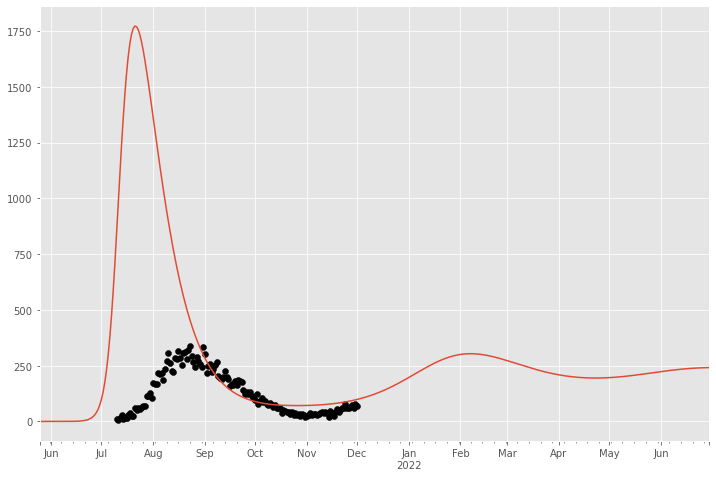

In [6]:
fig = pyplot.figure(figsize=(12, 8))
pyplot.style.use("ggplot")
axis = fig.add_subplot()
axis = derived_df[output].plot()
axis.scatter(notif_dates, notif_values, c="k")
fig.show()

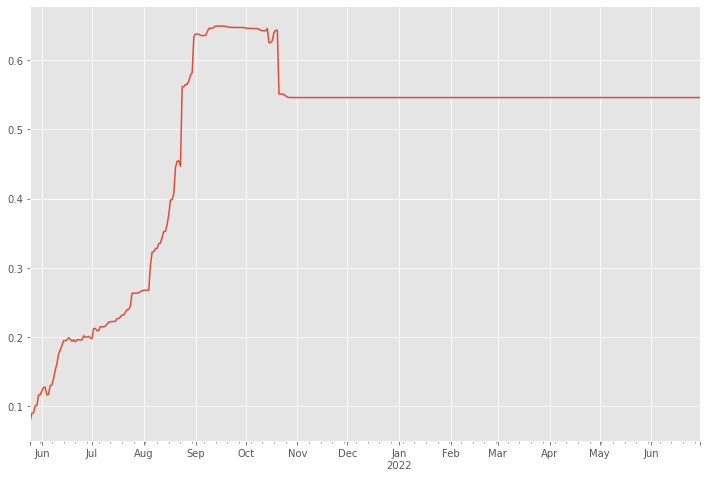

In [7]:
fig = pyplot.figure(figsize=(12, 8))
pyplot.style.use("ggplot")
axis = fig.add_subplot()
axis = derived_df["cdr"].plot()